# Wstęp do uczenia maszynowego - laboratorium 6

### Ocena jakości modeli

#### Pytania kontrolne
1. Twój kolega pochwalił się, że jego model osiągnął dokładność 99% w zadaniu klasyfikacji, czy dana osoba jest chora na chorobę, na którą choruje jedna na 200 osób. Czy kolega ma się czym chwalić?
2. Jaki model klasyfikacji binarnej zapewni precyzję 100%?
3. Jaki model klasyfikacji binarnej zapewni czułość 100%?


#### Ćwiczenie
Załaduj dane dotyczące raka piersi (`breast_cancer`) z `sklearn.datasets` i zapoznaj się z nimi. Dokonaj podziału na zbiór uczący i testowy (30%). Użyj opcji `stratify` przy podziale.

In [31]:
from sklearn.datasets import load_breast_cancer

print(f'Dataset description: {load_breast_cancer().DESCR}')
print(f'Feature names: {load_breast_cancer().feature_names}')

Dataset description: .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance,

In [32]:
# Splitting the dataset

from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print(X_train.shape)
print(y_train.shape)

(398, 30)
(398,)


#### Ćwiczenie
Wytrenuj model regresji logistycznej i sprawdź jego dokładność na zbiorze testowym.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(n_jobs=5, random_state=42, max_iter=10000)

model.fit(X=X_train, y=y_train)
y_pred = model.predict(X=X_test)
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'Model accuracy: {acc}')

Model accuracy: 0.9473684210526315


#### Ćwiczenie
Sprawdź, jakie prawdopodobieństwa przypisywane są poszczególnym obserwacjom ze zbioru testowego (`model.predict_proba()`)

dla czytelności można użyć
`np.set_printoptions(precision=3, suppress=True)`


In [34]:
import numpy as np

np.set_printoptions(precision=3, suppress=True)
y_prob = model.predict_proba(X=X_test)
print(y_prob)

[[0.867 0.133]
 [0.007 0.993]
 [0.    1.   ]
 [0.986 0.014]
 [0.363 0.637]
 [0.984 0.016]
 [0.    1.   ]
 [0.999 0.001]
 [0.002 0.998]
 [1.    0.   ]
 [0.    1.   ]
 [0.01  0.99 ]
 [0.998 0.002]
 [0.455 0.545]
 [0.    1.   ]
 [0.811 0.189]
 [1.    0.   ]
 [0.041 0.959]
 [0.    1.   ]
 [0.043 0.957]
 [0.009 0.991]
 [0.087 0.913]
 [0.014 0.986]
 [1.    0.   ]
 [1.    0.   ]
 [0.157 0.843]
 [0.003 0.997]
 [0.177 0.823]
 [0.978 0.022]
 [1.    0.   ]
 [0.049 0.951]
 [1.    0.   ]
 [0.003 0.997]
 [0.001 0.999]
 [1.    0.   ]
 [0.    1.   ]
 [0.084 0.916]
 [0.001 0.999]
 [0.009 0.991]
 [0.091 0.909]
 [0.182 0.818]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.002 0.998]
 [0.373 0.627]
 [0.025 0.975]
 [0.    1.   ]
 [0.    1.   ]
 [0.875 0.125]
 [0.001 0.999]
 [0.013 0.987]
 [1.    0.   ]
 [1.    0.   ]
 [0.002 0.998]
 [0.009 0.991]
 [1.    0.   ]
 [0.005 0.995]
 [0.202 0.798]
 [0.545 0.455]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.001 0.999]
 [0.008 0.

### Miary jakości modeli

W scikit-learn funkcje związane z oceną jakości modeli znajdują się w `sklearn.metrics`.
https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

#### Ćwiczenie
Policz macierz pomyłek wykorzystując funkcję `confusion_matrix`.

In [35]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(f'Confusion matrix:\n{cm}')
print('')


def confusion_matrix_scorer(clf, X, y):
    y_pred = clf.predict(X)
    cm = confusion_matrix(y, y_pred)
    return {'tn': cm[0, 0], 'fp': cm[0, 1], 'fn': cm[1, 0], 'tp': cm[1, 1]}


cv_results = cross_validate(model, X, y, cv=5, scoring=confusion_matrix_scorer)
print(f'TP results: {cv_results["test_tp"]}')
print(f'FN results: {cv_results["test_fn"]}')

Confusion matrix:
[[ 57   7]
 [  2 105]]

TP results: [71 69 71 68 67]
FN results: [0 2 1 4 4]


#### Ćwiczenie
Wykorzystaj funkcję `plot_confusion_matrix`, aby narysować macierz pomyłek dla zbioru testowego.

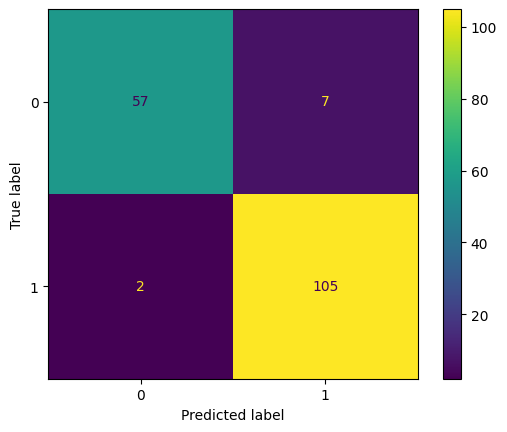

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

#### Ćwiczenie
Sprawdź dokładność modelu dla różnych wartości progu klasyfikacji (wykorzystaj `predict_proba` w pętli) od 0.1 do 0.9.

In [37]:
# Get predicted probabilities

probabilities = model.predict_proba(X=X_test)[:, 1]

threshold_values = np.arange(0.1, 1.0, 0.1)
for value in threshold_values:
    predictions = (probabilities > value).astype(int)
    acc = accuracy_score(y_true=y_test, y_pred=predictions)
    print(f'Accuracy for value {value:.1f}: {acc}')

Accuracy for value 0.1: 0.9298245614035088
Accuracy for value 0.2: 0.9532163742690059
Accuracy for value 0.3: 0.9473684210526315
Accuracy for value 0.4: 0.9532163742690059
Accuracy for value 0.5: 0.9473684210526315
Accuracy for value 0.6: 0.9532163742690059
Accuracy for value 0.7: 0.9473684210526315
Accuracy for value 0.8: 0.9532163742690059
Accuracy for value 0.9: 0.9122807017543859


#### Ćwiczenie
Powtórz poprzednie ćwiczenie, tym razem dla precyzji, czułości oraz F1.

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score

for value in threshold_values:
    predictions = (probabilities > value).astype(int)
    precision = precision_score(y_true=y_test, y_pred=predictions, zero_division=1.0)
    recall = recall_score(y_true=y_test, y_pred=predictions)
    f1 = f1_score(y_true=y_test, y_pred=predictions)
    print(f'Accuracy for {value:.1f}: Precision: {precision:.3f} | Recall: {recall:.3f} | F1: {f1:.3f}')

Accuracy for 0.1: Precision: 0.899 | Recall: 1.000 | F1: 0.947
Accuracy for 0.2: Precision: 0.930 | Recall: 1.000 | F1: 0.964
Accuracy for 0.3: Precision: 0.930 | Recall: 0.991 | F1: 0.959
Accuracy for 0.4: Precision: 0.938 | Recall: 0.991 | F1: 0.964
Accuracy for 0.5: Precision: 0.938 | Recall: 0.981 | F1: 0.959
Accuracy for 0.6: Precision: 0.946 | Recall: 0.981 | F1: 0.963
Accuracy for 0.7: Precision: 0.954 | Recall: 0.963 | F1: 0.958
Accuracy for 0.8: Precision: 0.971 | Recall: 0.953 | F1: 0.962
Accuracy for 0.9: Precision: 0.979 | Recall: 0.879 | F1: 0.926


#### Ćwiczenie
Wygeneruj raport klasyfikacji z użyciem funkcji `classification_report`.

In [39]:
from sklearn.metrics import classification_report

cr = classification_report(y_true=y_test, y_pred=y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        64
           1       0.94      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



#### Ćwiczenie
Narysuj krzywą precyzja-czułość z wykorzystaniem funkcji `plot_precision_recall_curve`.

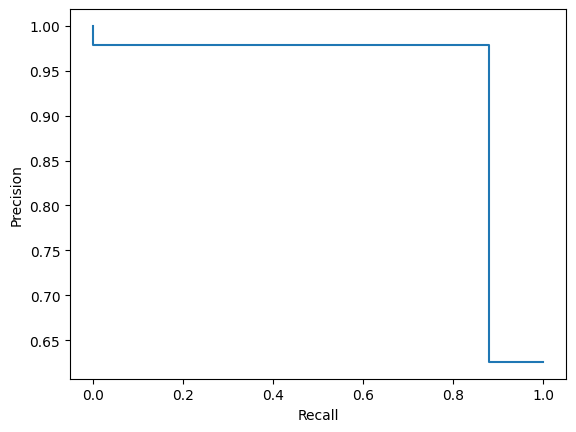

In [40]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

threshold = 0.5
y_pred = (predictions > threshold).astype(int)

precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)

# Compute precision-recall pairs

precision, recall, _ = precision_recall_curve(y_true=y_test, probas_pred=predictions)

disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

#### Ćwiczenie
Narysuj krzywą ROC z wykorzystaniem funkcji `plot_roc_curve`.

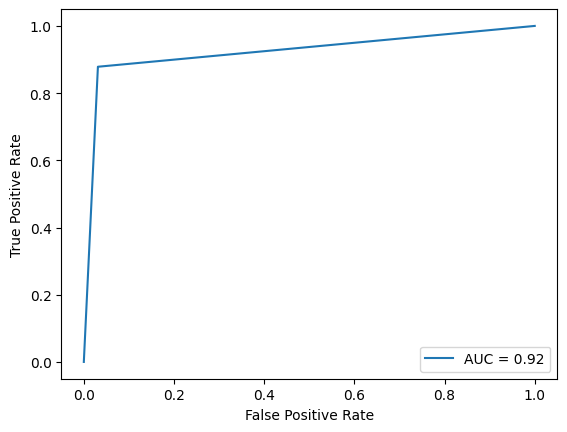

In [41]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=predictions)
roc_auc = auc(x=fpr, y=tpr)

disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
disp.plot()
plt.show()